## Exploratory analysis on the result of dge_MAST function

- dge_MAST function returns a list of genes with p-values, z-scores, etc.

In this notebook, we will grab the result of the dge_MAST function on XAUT1-Biopsies object (for each pair of conditions), then do the downstream analyses.

For this, we can refer to the analyses and visualization methods used in CTA paper.


In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [4]:
df_XAUT1_Biopsies_coarse = pd.read_csv('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/result/XAUT1_Biopsies_condition_all_celltypes_DGE_coarse_MAST.csv')
df_XAUT1_Biopsies_coarse

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ABCA6,8.415616e-07,-0.758744,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
1,ABCA8,2.246959e-36,-2.340803,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
2,ABI3BP,1.808230e-07,-0.744061,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
3,ACKR3,2.441425e-10,-0.921684,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
4,ACTA2,9.526748e-09,0.894032,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
4947,CTSC,4.863699e-02,-2.686793,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4948,MTND1P23,1.866807e-03,2.276256,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4949,RPS4Y1,7.805907e-05,2.554487,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4950,RPS7,3.954532e-02,1.937388,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes


In [5]:
array_cell_types = df_XAUT1_Biopsies_coarse['cell_type'].unique()
array_cell_types

array(['11-Stromal-fibroblast', '03-CD4 T', '04-CD8 T', '02-B',
       '01-Plasma cells', '10-Epithelial', '09-Cycling',
       '14-Mito Hi immune', '05-ILC2 and ILC3', '13-Enteric neural',
       '12-Endothelial', '06-NK', '07-Mast', '08-MNP'], dtype=object)

In [6]:
df_XAUT1_Biopsies_coarse.head()

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ABCA6,8.415616e-07,-0.758744,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
1,ABCA8,2.246959e-36,-2.340803,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
2,ABI3BP,1.808230e-07,-0.744061,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
3,ACKR3,2.441425e-10,-0.921684,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
4,ACTA2,9.526748e-09,0.894032,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes


In [32]:
df_XAUT1_Biopsies_coarse[df_XAUT1_Biopsies_coarse["pval"]==0]

,gene,pval,log2fc,cell_type,tissue,method,covariate
2344,RP11-632C17--A.1,0.0,2.056299,03-CD4 T,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
3436,XIST,0.0,-4.488460,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3927,RP11-632C17--A.1,0.0,-2.037677,03-CD4 T,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3929,RPS4Y1,0.0,3.615031,03-CD4 T,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4178,RPS4Y1,0.0,4.168352,04-CD8 T,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes


## Analysis by cell type class

For each pair of conditions, check which cell-types have more differentially expressed genes.

### (1) HC vs UCNB

In [10]:
df_XAUT1_Biopsies_coarse["tissue"].unique()

array(['XAUT1_Biopsies_HC_UCV', 'XAUT1_Biopsies_UCNB_HC',
       'XAUT1_Biopsies_UCNB_UCV'], dtype=object)

In [30]:
# First, let's subset the anndata for pairs of conditions
# HC vs UCNB
df_XAUT1_Biopsies_coarse_HC_UCNB = df_XAUT1_Biopsies_coarse[df_XAUT1_Biopsies_coarse["tissue"]=="XAUT1_Biopsies_UCNB_HC"]
df_XAUT1_Biopsies_coarse_HC_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
1287,ANKRD36BP2,9.937889e-08,-0.596183,01-Plasma cells,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
1288,ANKRD37,1.557256e-27,-0.965808,01-Plasma cells,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
1289,BRD2,1.247815e-07,-0.673593,01-Plasma cells,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
1290,BRSK1,2.684540e-43,-0.780608,01-Plasma cells,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
1291,BTG1,9.278736e-09,-0.719645,01-Plasma cells,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
...,...,...,...,...,...,...,...
3322,S100B,1.640682e-02,0.707625,06-NK,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
3323,TCF25,1.750115e-02,1.777878,06-NK,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
3324,XCL1,4.516962e-04,-2.850090,06-NK,XAUT1_Biopsies_UCNB_HC,MAST,ngenes
3325,XCL2,2.031948e-02,-2.003089,06-NK,XAUT1_Biopsies_UCNB_HC,MAST,ngenes


In [12]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Biopsies_coarse_HC_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Biopsies_coarse_HC_UCNB[df_XAUT1_Biopsies_coarse_HC_UCNB["cell_type"]==cell_type]
    #df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)


<AxesSubplot:>

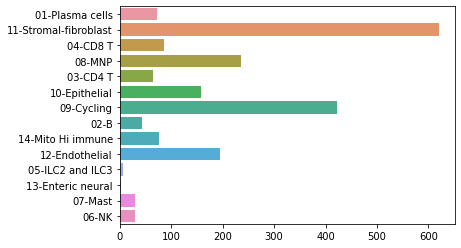

In [13]:
num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

### (2) HC vs UCV

In [14]:
# HC vs UCV
df_XAUT1_Biopsies_coarse_HC_UCV = df_XAUT1_Biopsies_coarse[df_XAUT1_Biopsies_coarse["tissue"]=="XAUT1_Biopsies_HC_UCV"]
df_XAUT1_Biopsies_coarse_HC_UCV

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ABCA6,8.415616e-07,-0.758744,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
1,ABCA8,2.246959e-36,-2.340803,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
2,ABI3BP,1.808230e-07,-0.744061,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
3,ACKR3,2.441425e-10,-0.921684,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
4,ACTA2,9.526748e-09,0.894032,11-Stromal-fibroblast,XAUT1_Biopsies_HC_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
1282,TMEM176B,2.809403e-06,0.969320,08-MNP,XAUT1_Biopsies_HC_UCV,MAST,ngenes
1283,TNFSF13B,1.122508e-02,0.597724,08-MNP,XAUT1_Biopsies_HC_UCV,MAST,ngenes
1284,TUBB,3.945115e-03,0.972690,08-MNP,XAUT1_Biopsies_HC_UCV,MAST,ngenes
1285,VAMP5,3.934689e-08,0.928154,08-MNP,XAUT1_Biopsies_HC_UCV,MAST,ngenes


<AxesSubplot:>

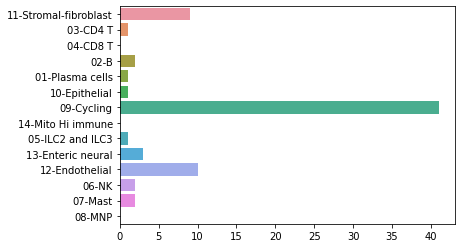

In [15]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Biopsies_coarse_HC_UCV["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Biopsies_coarse_HC_UCV[df_XAUT1_Biopsies_coarse_HC_UCV["cell_type"]==cell_type]
    df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

### (3) UCNB vs UCV

In [16]:
df_XAUT1_Biopsies_coarse["tissue"].unique()

array(['XAUT1_Biopsies_HC_UCV', 'XAUT1_Biopsies_UCNB_HC',
       'XAUT1_Biopsies_UCNB_UCV'], dtype=object)

In [17]:
# UCNB vs UCV
df_XAUT1_Biopsies_coarse_UCV_UCNB = df_XAUT1_Biopsies_coarse[df_XAUT1_Biopsies_coarse["tissue"]=="XAUT1_Biopsies_UCNB_UCV"]
df_XAUT1_Biopsies_coarse_UCV_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
3327,AL928768.3,1.431598e-34,-1.471975,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3328,ANKRD28,1.336350e-09,-0.999793,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3329,ARL4C,1.496780e-16,0.655550,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3330,ATP5D,1.194700e-07,-0.764226,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3331,BTG1,5.311324e-08,0.808568,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
4947,CTSC,4.863699e-02,-2.686793,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4948,MTND1P23,1.866807e-03,2.276256,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4949,RPS4Y1,7.805907e-05,2.554487,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4950,RPS7,3.954532e-02,1.937388,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes


In [18]:
df_XAUT1_Biopsies_coarse_UCV_UCNB.sort_values('log2fc')

,gene,pval,log2fc,cell_type,tissue,method,covariate
4935,XIST,2.704663e-20,-5.527060,05-ILC2 and ILC3,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3436,XIST,0.000000e+00,-4.488460,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4094,TIMP1,1.016143e-40,-4.458299,08-MNP,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4946,CCL2,2.234050e-02,-3.871827,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4222,HLA-DRB5,5.775835e-131,-3.809783,02-B,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
4612,HLA-DRA,2.841108e-15,3.074669,12-Endothelial,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4370,MTND1P23,2.318662e-170,3.493363,10-Epithelial,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3929,RPS4Y1,0.000000e+00,3.615031,03-CD4 T,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4178,RPS4Y1,0.000000e+00,4.168352,04-CD8 T,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes


In [19]:
df_XAUT1_Biopsies_coarse_UCV_UCNB[abs(df_XAUT1_Biopsies_coarse_UCV_UCNB["log2fc"])>2]

,gene,pval,log2fc,cell_type,tissue,method,covariate
3400,RPS4Y1,2.600045e-215,2.038848,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3436,XIST,0.000000e+00,-4.488460,01-Plasma cells,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3445,ADAMDEC1,8.452754e-35,2.529168,11-Stromal-fibroblast,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3496,CCL11,4.625925e-61,2.938791,11-Stromal-fibroblast,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
3513,CIRBP,1.959030e-24,2.139514,11-Stromal-fibroblast,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
4946,CCL2,2.234050e-02,-3.871827,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4947,CTSC,4.863699e-02,-2.686793,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4948,MTND1P23,1.866807e-03,2.276256,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes
4949,RPS4Y1,7.805907e-05,2.554487,13-Enteric neural,XAUT1_Biopsies_UCNB_UCV,MAST,ngenes


<AxesSubplot:>

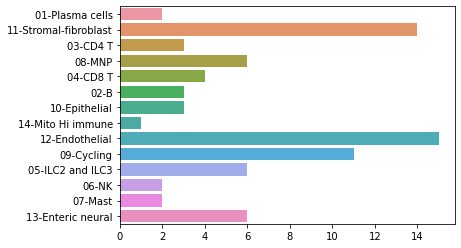

In [21]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Biopsies_coarse_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Biopsies_coarse_UCV_UCNB[df_XAUT1_Biopsies_coarse_UCV_UCNB["cell_type"]==cell_type]
    df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

## 2D visuliazation of the DGE results (Healthy-Disease vs Disease-Treatment)

## Subset for cell-types to check the DGE

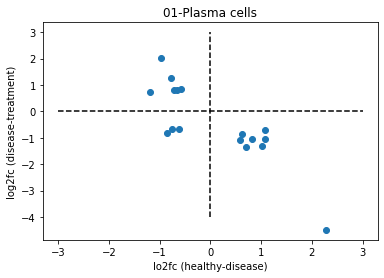

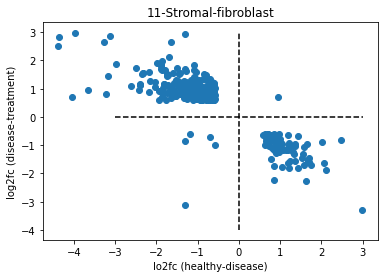

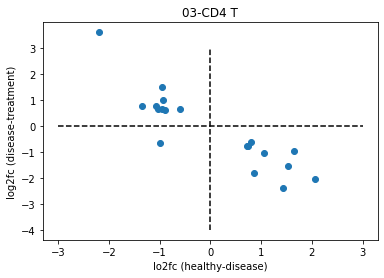

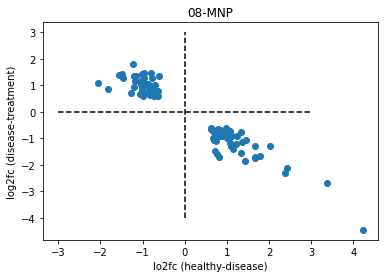

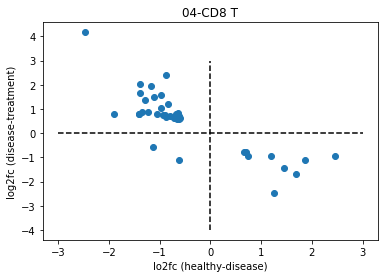

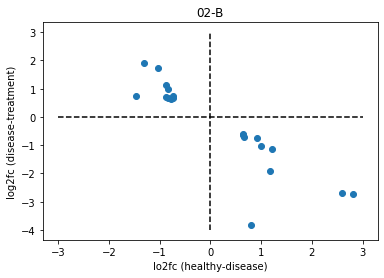

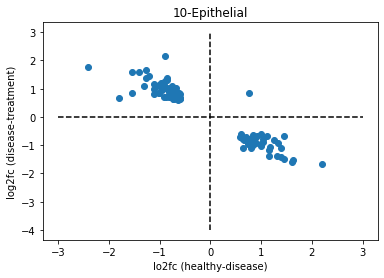

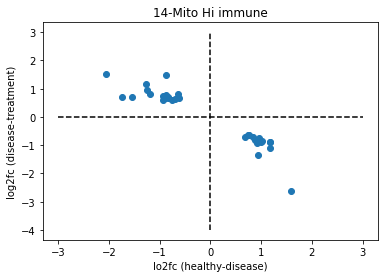

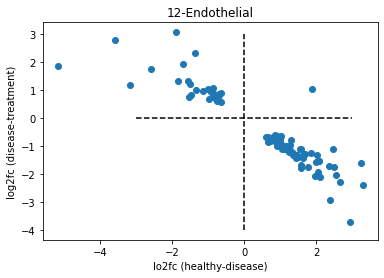

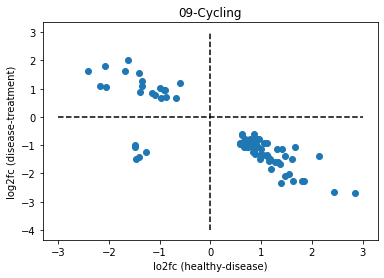

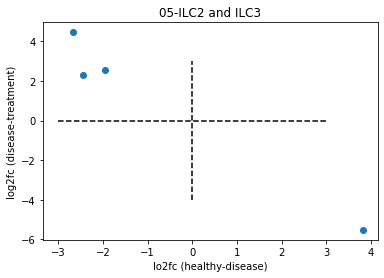

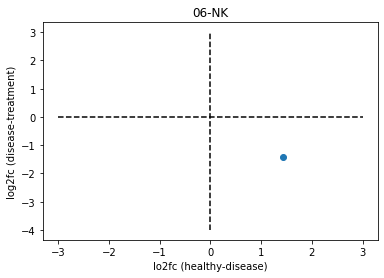

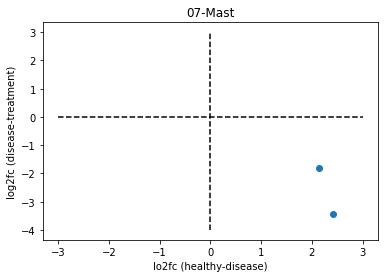

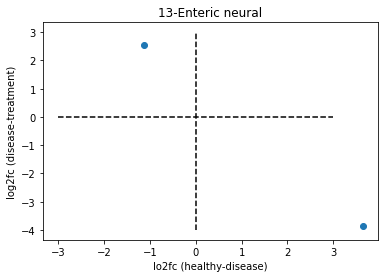

In [22]:
import math
math.nan

# define the list of cell-types
list_cell_types = df_XAUT1_Biopsies_coarse_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

# initialize the dataframe to save the resulting genes with their p-values, log2fc, cell-type, etc.
df_DGE_genes_filtered = pd.DataFrame()
# joint_gene_set_master = []
index = 0 # index for the df_DGE_genes_filtered

for cell_type in list_cell_types:
    df_subset_HC_UCNB = df_XAUT1_Biopsies_coarse_HC_UCNB[df_XAUT1_Biopsies_coarse_HC_UCNB["cell_type"]==cell_type]
    df_subset_UCNB_UCV = df_XAUT1_Biopsies_coarse_UCV_UCNB[df_XAUT1_Biopsies_coarse_UCV_UCNB["cell_type"]==cell_type]

#     # filter out for abs(log2fc) > 2
#     df_subset_HC_UCNB = df_subset_HC_UCNB[abs(df_subset_HC_UCNB["log2fc"])>2]
#     df_subset_UCNB_UCV = df_subset_UCNB_UCV[abs(df_subset_UCNB_UCV["log2fc"])>2]

    list_genes_HC_UCNB = df_subset_HC_UCNB["gene"].to_list()
    list_genes_UCNB_UCV = df_subset_UCNB_UCV["gene"].to_list()
    list_genes_UCNB_UCV

    joint_gene_set = list(set(list_genes_HC_UCNB) & set(list_genes_UCNB_UCV))
    joint_gene_set
#     # Append the joint_gene_set to the master list
#     joint_gene_set_master.append(joint_gene_set)
    #gene_set_joint = set(list_genes_HC_UCNB).intersection(set(list_genes_UCNB_UCV))

    df_subset_HC_UCNB_joint_genes = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"].isin(joint_gene_set)]
    df_subset_UCNB_UCV_joint_genes = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"].isin(joint_gene_set)]

    if len(joint_gene_set)>0:
        plt.figure()
        plt.scatter(df_subset_HC_UCNB_joint_genes["log2fc"], df_subset_UCNB_UCV_joint_genes['log2fc'])
        plt.plot([-3,3], [0,0], '--k')
        plt.plot([0,0],[-4,3], '--k')
        plt.xlabel('lo2fc (healthy-disease)') # HC vs UCNB
        plt.ylabel('log2fc (disease-treatment)') # UCNB vs UCV
        plt.title(cell_type)
    
    
    for k in range(0,len(joint_gene_set)):
        gene = joint_gene_set[k]
        log2fc_value1 = df_subset_HC_UCNB_joint_genes[df_subset_HC_UCNB_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        log2fc_value2 = df_subset_UCNB_UCV_joint_genes[df_subset_UCNB_UCV_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        if (log2fc_value1*log2fc_value2)<0:
            df_DGE_genes_filtered.loc[index,"gene"] = gene
            df_DGE_genes_filtered.loc[index,"cell_type"] = cell_type#df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["cell_type"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_HC_UCNB"] = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_UCNB_UCV"] = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_HC_UCNB"]= df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["log2fc"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_UCNB_UCV"]= df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["log2fc"].iloc[0]
            
            if gene in df_XAUT1_Biopsies_coarse_HC_UCV["gene"].to_list():
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = df_XAUT1_Biopsies_coarse_HC_UCV[df_XAUT1_Biopsies_coarse_HC_UCV["gene"]==gene]["log2fc"].iloc[0]
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = df_XAUT1_Biopsies_coarse_HC_UCV[df_XAUT1_Biopsies_coarse_HC_UCV["gene"]==gene]["pval"].iloc[0]
            else:
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = 0
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = math.nan
        else:
            df_DGE_genes_filtered = df_DGE_genes_filtered
                
                
        index = index+1
        



    

In [25]:
df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]=="11-Stromal-fibroblast"]

,gene,cell_type,pval_HC_UCNB,pval_UCNB_UCV,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCV
17,PABPC1,11-Stromal-fibroblast,1.838146e-02,1.607717e-02,-0.591288,0.680461,0.000000,NaN
18,INTS6,11-Stromal-fibroblast,1.726584e-16,2.769784e-09,-1.165847,0.904712,0.000000,NaN
19,FBLN1,11-Stromal-fibroblast,6.160205e-08,2.737798e-16,-1.310218,1.681446,0.000000,NaN
20,ATP5I,11-Stromal-fibroblast,1.348043e-04,7.925840e-07,-0.806621,1.024618,-0.940068,3.507028e-05
21,SERPINF1,11-Stromal-fibroblast,3.060862e-06,1.837077e-03,-0.999683,0.716074,0.000000,NaN
...,...,...,...,...,...,...,...,...
334,LGALS3BP,11-Stromal-fibroblast,7.468007e-04,1.135625e-05,-0.727361,0.869927,0.000000,NaN
335,SRM,11-Stromal-fibroblast,2.060868e-13,1.244637e-10,0.798082,-0.727925,0.000000,NaN
336,DUT,11-Stromal-fibroblast,1.006942e-14,1.305890e-10,-1.065749,0.899211,1.603782,3.092022e-03
337,COL14A1,11-Stromal-fibroblast,2.733964e-24,1.964679e-30,-1.505824,1.740871,0.000000,NaN


In [26]:
# reorder the columns in the dataframe
df_DGE_genes_filtered = df_DGE_genes_filtered[["gene","cell_type","log2fc_HC_UCNB","log2fc_UCNB_UCV","log2fc_HC_UCV","pval_HC_UCNB","pval_UCNB_UCV","pval_HC_UCV"]]
df_DGE_genes_filtered

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
0,DDX3Y,01-Plasma cells,-0.778164,1.272547,0.927331,2.316939e-84,2.222392e-136,1.552942e-24
2,S100A6,01-Plasma cells,-0.656205,0.808610,0.000000,1.709257e-07,3.912982e-09,NaN
3,S100A4,01-Plasma cells,-0.585914,0.834138,-0.989745,2.975367e-08,2.856677e-13,7.300448e-05
4,PDIA6,01-Plasma cells,0.589452,-1.075154,-0.638800,3.411910e-04,4.686116e-15,1.933876e-05
5,RPS26,01-Plasma cells,1.087157,-0.687587,-0.714276,1.983172e-36,1.699640e-09,3.087136e-02
...,...,...,...,...,...,...,...,...
795,RPS26,06-NK,1.435366,-1.427350,-0.714276,1.329112e-03,2.975703e-02,3.087136e-02
796,HPGDS,07-Mast,2.411283,-3.445839,0.000000,4.187641e-02,3.492868e-02,NaN
797,TPSAB1,07-Mast,2.144256,-1.798240,0.000000,4.096170e-04,3.492868e-02,NaN
798,RPS4Y1,13-Enteric neural,-1.121995,2.554487,2.807637,3.855729e-02,7.805907e-05,7.151990e-80


In [27]:
df_DGE_genes_filtered.to_csv('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/result/XAUT1_Biopsies_coarse_filtered_by_combos.csv')

In [28]:
df_DGE_genes_filtered.sort_values('log2fc_HC_UCNB')

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
707,FABP5,12-Endothelial,-5.170013,1.853805,-2.676553,1.276317e-37,3.125388e-05,1.221213e-46
159,ADAMDEC1,11-Stromal-fibroblast,-4.382694,2.529168,-1.703698,2.619570e-104,8.452754e-35,8.627737e-17
310,SEPP1,11-Stromal-fibroblast,-4.351698,2.832993,-1.194318,5.589051e-102,2.834276e-48,7.019699e-08
211,CCL8,11-Stromal-fibroblast,-4.045416,0.690770,-3.261682,6.946849e-158,1.113962e-08,7.151990e-80
284,TXNIP,11-Stromal-fibroblast,-3.977466,2.956986,-0.801298,6.809711e-88,4.620759e-47,1.612535e-06
...,...,...,...,...,...,...,...,...
654,LMNA,12-Endothelial,3.279866,-2.381447,-0.993621,1.494988e-11,1.026945e-08,1.794527e-17
418,SOD2,08-MNP,3.366590,-2.680698,0.000000,8.808938e-35,5.124655e-11,NaN
799,CCL2,13-Enteric neural,3.636879,-3.871827,-1.304060,3.855729e-02,2.234050e-02,2.507708e-08
794,XIST,05-ILC2 and ILC3,3.812397,-5.527060,-4.429271,1.039801e-10,2.704663e-20,7.631347e-180


Text(0.5, 1.0, 'all cell-types')

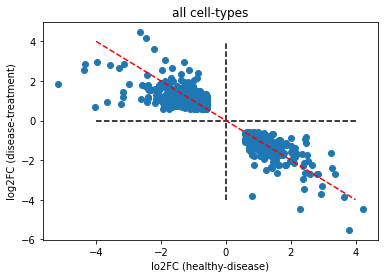

In [29]:
# 2D visualization for all cell-types (XAUT1-Blood, fine)
plt.figure()
plt.scatter(df_DGE_genes_filtered["log2fc_HC_UCNB"], df_DGE_genes_filtered['log2fc_UCNB_UCV'])
plt.plot([-4,4], [0,0], '--k')
plt.plot([0,0],[-4,4], '--k')
plt.plot([-4,4],[4,-4],'--r')
plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
plt.title("all cell-types")